<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

## Preprocess Data

In [1]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_asos.csv"
df = pd.read_csv(csv_filename1)

In [2]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)


In [3]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,DV,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,0,2023-04-30 03:00:00,57.919565,55.435556,3.970000,91.751778,29.741089,9.480000,57.897778,CLR
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,1,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,0,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,1,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.000000,64.229268,CLR
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,0,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-17 02:00:00,58.643810,53.248095,1.634146,83.465952,30.222143,9.575000,58.635714,SCT
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-25 02:00:00,53.233333,49.070000,0.512195,86.456190,29.981429,9.926829,53.203571,CLR
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.000000,55.557955,CLR
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,0,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR


https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

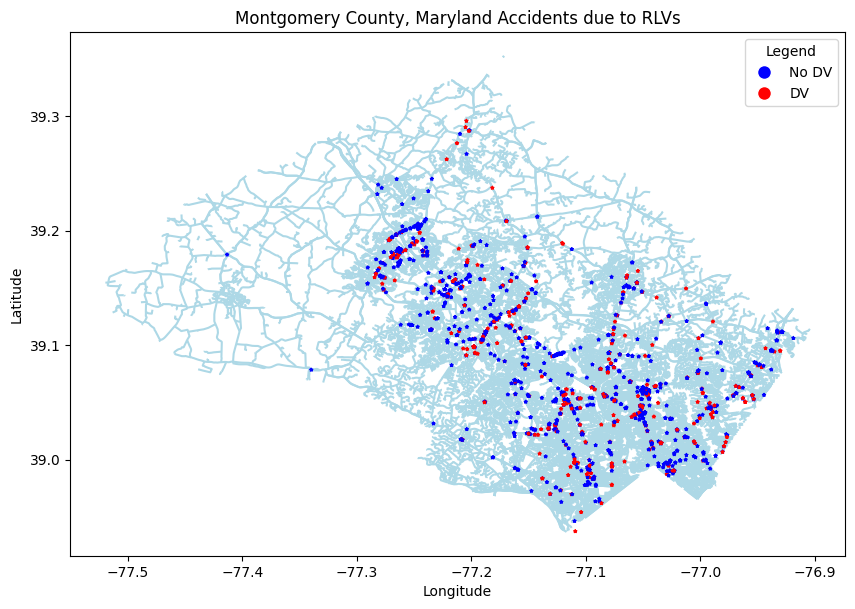

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [5]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [6]:
df.isna().sum()

Belts                 0
Property Damage       0
Commercial License    0
Commercial Vehicle    0
Alcohol               0
Work Zone             0
State                 0
VehicleType           0
Year                  1
Make                  0
Model                 0
Color                 5
Race                  0
Gender                0
Driver City           0
Driver State          0
DL State              1
DV                    0
DATE                  0
tmpf                  0
dwpf                  0
sknt                  0
relh                  0
alti                  0
vsby                  0
feel                  0
skyc1                 0
dtype: int64

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,DV,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,0,2023-04-30 03:00:00,57.919565,55.435556,3.97,91.751778,29.741089,9.48,57.897778,CLR
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,1,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,0,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,1,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.0,64.229268,CLR
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,0,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,0,2013-09-17 02:00:00,58.64381,53.248095,1.634146,83.465952,30.222143,9.575,58.635714,SCT
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,0,2013-09-25 02:00:00,53.233333,49.07,0.512195,86.45619,29.981429,9.926829,53.203571,CLR
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,0,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.0,55.557955,CLR
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,0,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR


In [8]:
df['VehicleType'].value_counts()

VehicleType
02 - Automobile              1580
05 - Light Duty Truck          90
28 - Other                     40
03 - Station Wagon             31
01 - Motorcycle                18
06 - Heavy Duty Truck          15
10 - Transit Bus                6
07 - Truck/Road Tractor         3
08 - Recreational Vehicle       1
20 - Commercial Rig             1
29 - Unknown                    1
Name: count, dtype: int64

In [9]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    elif any(category in vehicle_type for category in ['05 - Light Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle',]):
        return 'Heavy'
    else:
        return 'Very Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [10]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)

In [11]:
df['Vehicle'].value_counts()

Vehicle
2014, HONDA, ACCORD         9
2004, HONDA, ACCORD         9
2006, CHEV, MALIBU          7
2010, TOYOTA, COROLLA       6
2014, TOYOTA, CAMRY         6
                           ..
2002, VOLVO, S60            1
2012, NISSAN, SENTRA 4DR    1
2009, SCION, TC             1
2003, MERCEDES, E320        1
1996, ISUZU, RODEO          1
Name: count, Length: 1384, dtype: int64

In [12]:
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)
df.columns

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'State', 'VehicleType', 'Color', 'Race',
       'Gender', 'Driver City', 'Driver State', 'DL State', 'DV', 'DATE',
       'tmpf', 'dwpf', 'sknt', 'relh', 'alti', 'vsby', 'feel', 'skyc1',
       'Vehicle'],
      dtype='object')

In [13]:
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Color,Race,...,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1,Vehicle
0,No,No,No,No,No,No,MD,Medium,WHITE,BLACK,...,2023-04-30 03:00:00,57.919565,55.435556,3.97,91.751778,29.741089,9.48,57.897778,CLR,"2020, LINC, UT"
1,No,No,No,No,No,No,MD,Medium,"BLUE, LIGHT",HISPANIC,...,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN,"2023, MAZDA, CX-5"
2,No,Yes,No,No,No,No,MD,Medium,WHITE,BLACK,...,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR,"2023, VOLK, ATLAS"
3,No,No,No,No,No,No,MD,Medium,GRAY,WHITE,...,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.0,64.229268,CLR,"2012, HONDA, ODYSSEY"
4,No,Yes,No,No,No,No,MD,Medium,BLACK,HISPANIC,...,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC,"2018, HOND, SW"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,Medium,GREEN,ASIAN,...,2013-09-17 02:00:00,58.64381,53.248095,1.634146,83.465952,30.222143,9.575,58.635714,SCT,"2005, HOND, 4S"
1782,No,No,No,No,No,No,MD,Medium,BLACK,WHITE,...,2013-09-25 02:00:00,53.233333,49.07,0.512195,86.45619,29.981429,9.926829,53.203571,CLR,"1997, MITS, 4S"
1783,No,No,No,No,No,No,MD,Medium,BLACK,WHITE,...,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.0,55.557955,CLR,"2005, HOND, 4S"
1784,No,No,No,No,No,No,MD,Medium,WHITE,WHITE,...,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR,"1996, ISUZU, RODEO"


In [14]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date

In [15]:
def sine_of_time(time):
    return np.sin(2 * np.pi * (time.hour * 3600 + time.minute * 60 + time.second) / (24 * 3600))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

print(df[['Time', 'SinOfTime']])

          Time     SinOfTime
0     03:00:00  7.071068e-01
1     12:00:00 -3.216245e-16
2     10:00:00  5.000000e-01
3     14:00:00 -5.000000e-01
4     10:00:00  5.000000e-01
...        ...           ...
1781  02:00:00  5.000000e-01
1782  02:00:00  5.000000e-01
1783  02:00:00  5.000000e-01
1784  23:00:00 -2.588190e-01
1785  23:00:00 -2.588190e-01

[1786 rows x 2 columns]


In [16]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [17]:
df['TimeCategory']

0       non-peak
1       non-peak
2       non-peak
3       mid-peak
4       non-peak
          ...   
1781    non-peak
1782    non-peak
1783    non-peak
1784    non-peak
1785    non-peak
Name: TimeCategory, Length: 1786, dtype: object

In [18]:
dfo=df

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

columns_to_label_encode = ['Belts', 'Property Damage', 'Commercial License', 
                           'Commercial Vehicle', 'Alcohol', 'Gender', 'Work Zone']

columns_to_onehot_encode = ['State', 'VehicleType', 'Color', 'Race', 'Driver City',
                            'Vehicle', 'Driver State', 'DL State', 'skyc1', 'TimeCategory']

# Label Encoding
for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

# One-Hot Encoding
onehot_encoded = onehot_encoder.fit_transform(df[columns_to_onehot_encode]).toarray()
onehot_columns = onehot_encoder.get_feature_names_out(columns_to_onehot_encode)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

# Concatenate the DataFrames
df = pd.concat([df, df_onehot], axis=1)

# Drop the original columns that were one-hot encoded
df = df.drop(columns=columns_to_onehot_encode)
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,Gender,DV,DATE,tmpf,...,skyc1_BKN,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
0,0,0,0,0,0,0,0,0,2023-04-30,57.919565,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,1,1,2023-05-02,46.962791,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,0,0,2023-05-16,55.866667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,1,2023-05-17,64.221951,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,0,0,0,0,0,2023-05-20,57.889474,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,1,0,2013-09-17,58.64381,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1782,0,0,0,0,0,0,1,0,2013-09-25,53.233333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1783,0,0,0,0,0,0,1,0,2013-09-19,55.603182,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1784,0,0,0,0,0,0,1,0,2014-12-17,41.876923,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
x=df.drop(columns=['DV'])
y=df['DV']
x['DATE'] = pd.to_datetime(x['DATE']).astype('int64') // 10**9  
x['Time'] = x['Time'].apply(lambda time: (time.hour * 60*60 + time.minute * 60 + time.second) if pd.notnull(time) else pd.NaT)
x['tmpf'] = pd.to_numeric(x['tmpf'], errors='coerce')
x['dwpf'] = pd.to_numeric(x['dwpf'], errors='coerce')
x['sknt'] = pd.to_numeric(x['sknt'], errors='coerce')
x['relh'] = pd.to_numeric(x['relh'], errors='coerce')
x['alti'] = pd.to_numeric(x['alti'], errors='coerce')
x['vsby'] = pd.to_numeric(x['vsby'], errors='coerce')
x['feel'] = pd.to_numeric(x['feel'], errors='coerce')

y = pd.to_numeric(y, errors='coerce')

In [21]:
x

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,Gender,DATE,tmpf,dwpf,...,skyc1_BKN,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
0,0,0,0,0,0,0,0,1682812800,57.919565,55.435556,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,1,1682985600,46.962791,38.032558,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,0,1684195200,55.866667,52.961905,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,1684281600,64.221951,49.446341,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,0,0,0,0,1684540800,57.889474,56.616667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,1,1379376000,58.643810,53.248095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1782,0,0,0,0,0,0,1,1380067200,53.233333,49.070000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1783,0,0,0,0,0,0,1,1379548800,55.603182,49.180455,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1784,0,0,0,0,0,0,1,1418774400,41.876923,28.556757,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,
                                                    random_state=42, stratify=y)

## SMOTE

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [23]:
y.value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [24]:
print(x.dtypes) 
print(y.dtypes)  

Belts                      int32
Property Damage            int32
Commercial License         int32
Commercial Vehicle         int32
Alcohol                    int32
                          ...   
skyc1_VV                 float64
TimeCategory_am-peak     float64
TimeCategory_mid-peak    float64
TimeCategory_non-peak    float64
TimeCategory_pm-peak     float64
Length: 1742, dtype: object
int64


In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train, y_train)

In [26]:
y_OS.value_counts()

DV
0    859
1    859
Name: count, dtype: int64

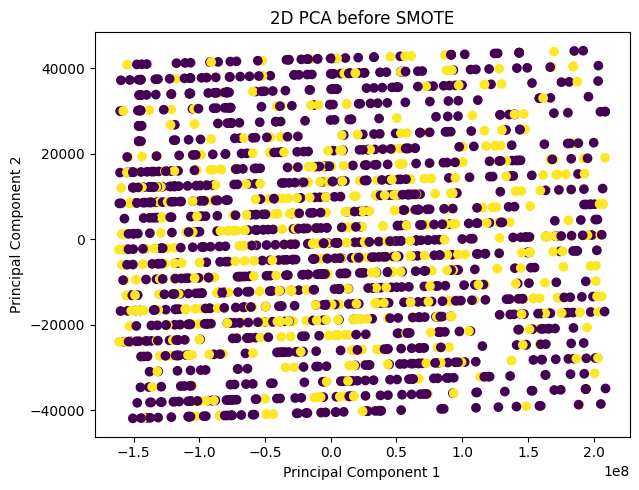

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('2D PCA before SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


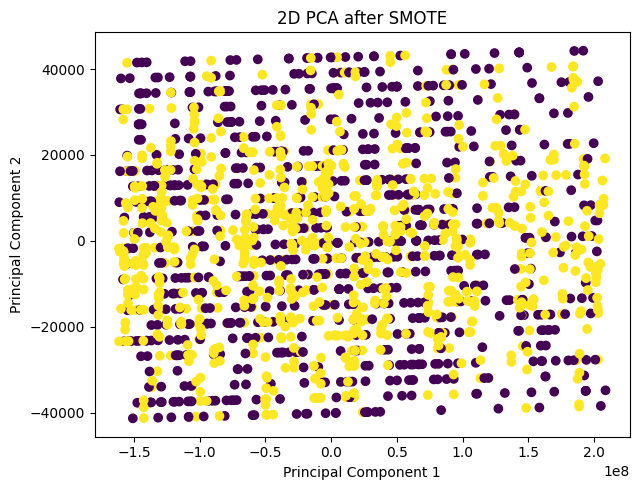

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_OS)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y_OS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OS, cmap='viridis')
plt.title('2D PCA after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchbnn as bnn
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [30]:
X_train

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,Gender,DATE,tmpf,dwpf,...,skyc1_BKN,skyc1_CLR,skyc1_FEW,skyc1_OVC,skyc1_SCT,skyc1_VV,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
1741,0,0,0,0,0,0,1,1565395200,61.984615,56.948718,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1530,0,0,0,0,0,0,0,1475625600,56.147895,53.643243,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,1684281600,64.221951,49.446341,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
854,0,0,0,0,0,0,0,1505779200,75.040476,65.938095,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1065,0,1,0,0,0,0,1,1611360000,38.002857,19.771429,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,1424995200,25.511765,17.196078,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1050,0,0,0,0,0,0,1,1638316800,31.837143,28.625714,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
508,1,1,0,0,0,0,1,1372377600,81.093514,68.976216,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1029,0,0,0,0,0,0,0,1593129600,83.720588,58.011765,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_OS.values)
X_test_normalized = scaler.transform(X_test.values)


os_x_train_tensor = torch.FloatTensor(X_train_normalized)
os_y_train_tensor = torch.FloatTensor(y_OS.values)

X_train_normalized = scaler.transform(X_train.values)

x_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.FloatTensor(y_train.values)
x_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.FloatTensor(y_test.values)

In [32]:
len(os_x_train_tensor)

1718

In [33]:
len(os_y_train_tensor)

1718

In [34]:
len(x_train_tensor)

1250

## Ensamble


In [35]:
import pandas as pd

corr_matrix = pd.concat([x,y],axis=1).corr()

target_corr = corr_matrix['DV']

sorted_corr = target_corr.abs().sort_values(ascending=False)

top_features = sorted_corr.index[1:] 

top_corr_values = target_corr[top_features]

result_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_corr_values})
print(result_df)

                                     Feature  Correlation
Property Damage              Property Damage    -0.371355
Belts                                  Belts     0.157717
TimeCategory_non-peak  TimeCategory_non-peak    -0.085160
TimeCategory_am-peak    TimeCategory_am-peak     0.075678
Driver City_MONROVIA    Driver City_MONROVIA     0.060772
...                                      ...          ...
Color_RED                          Color_RED    -0.000273
DL State_MD                      DL State_MD    -0.000263
Driver City_FREDERICK  Driver City_FREDERICK    -0.000100
skyc1_VV                           skyc1_VV     -0.000100
Work Zone                          Work Zone          NaN

[1742 rows x 2 columns]


### Random Forest and Decision Trees

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from skopt import gp_minimize
from skopt.space import Real, Integer,Categorical
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [37]:
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.int=np.int_

search_space = [
    Categorical(['gini', 'entropy', 'log_loss'], name='criterion'),
    Integer(1, 100, name='max_depth'),
    Integer(1, 4, name='n_jobs'),
    Real(0.1, 1.0, name='max_samples')]

def bayesian_optimization_tree(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, search_space, n_calls=10):
    @use_named_args(search_space)
    def evaluate_model(criterion, max_depth, 
                       n_jobs, max_samples):

        model = RandomForestClassifier(
            n_estimators=200,
            criterion=criterion,
            max_depth=max_depth,
            n_jobs=n_jobs,
            random_state=42,
            verbose=0,
            max_samples=max_samples
        )

        model.fit(x_train_tensor, y_train_tensor)

        test_predicted = model.predict(x_test_tensor)
        test_accuracy = accuracy_score(test_predicted, y_test_tensor)

        return 1-test_accuracy

    result = gp_minimize(evaluate_model, dimensions=search_space, n_calls=n_calls)

    print('Best Accuracy: %.3f' % (1.0 - result.fun))
    print('Best Parameters:', result.x)
    return result

result= bayesian_optimization_tree(X_train, y_train, X_test, y_test, search_space, n_calls=30)


c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Accuracy: 0.722
Best Parameters: ['entropy', 62, 2, 0.9849077972261095]


In [38]:

clf = RandomForestClassifier(n_estimators=200,criterion=result.x[0],max_depth=result.x[1], n_jobs=result.x[2],max_samples=result.x[3],random_state=42,)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7220149253731343

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       368
           1       0.77      0.16      0.27       168

    accuracy                           0.72       536
   macro avg       0.74      0.57      0.55       536
weighted avg       0.74      0.72      0.65       536



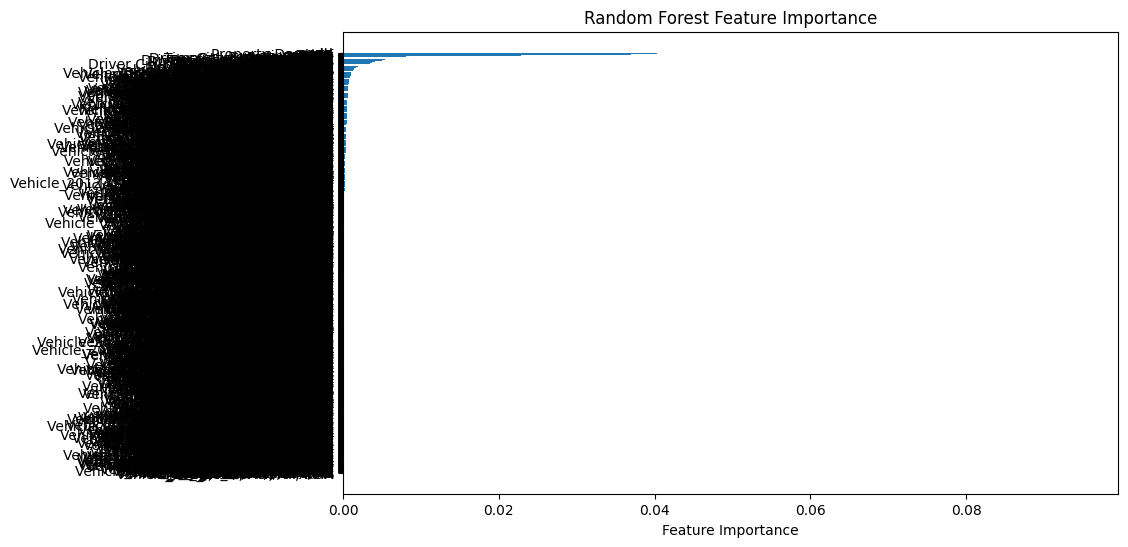

In [39]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
feature_names = x.columns 

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [40]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=200,criterion=result.x[0],max_depth=result.x[1], n_jobs=result.x[2],max_samples=result.x[3],random_state=42)

sfs = SequentialFeatureSelector(clf, n_features_to_select=10, direction='forward', cv=2)

sfs.fit(X_train, y_train)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

selected_features = X_train.columns[sfs.get_support()]

X_train_selected = sfs.transform(X_train)
X_val_selected = sfs.transform(X_test)

clf.fit(X_train_selected, y_train)
y_val_pred = clf.predict(X_val_selected)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", selected_features)
print("Validation Accuracy:", accuracy)


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [ ]:
result= bayesian_optimization_tree(X_train_selected, y_train, X_test_selected, y_test, search_space, n_calls=30)

Best Accuracy: 0.726
Best Parameters: ['gini', 58, 2, 0.10011783064978982]


In [ ]:
clf = RandomForestClassifier(n_estimators=200,criterion=result.x[0],max_depth=result.x[1], n_jobs=result.x[2],max_samples=result.x[3],random_state=42)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       368
           1       0.82      0.16      0.27       168

    accuracy                           0.73       536
   macro avg       0.77      0.57      0.55       536
weighted avg       0.75      0.73      0.65       536



-----------------------